## Full Data Workflow A-Z: Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("cars_unclean.csv")

Lets __inspect__ the DataFrame and identify obviously __inconsistent data__!

In [3]:
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO
5,15.0,8,429.0,198.0 hp,4341,10.0,70,usa,FORD GALAXIE 500
6,14.0,8,454.0,220.0 hp,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0 hp,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0 hp,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0 hp,3850,8.5,70,usa,amc ambassador dpl


In [4]:
cars.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
319,25.0,4,104.0,95.0 hp,2375,17.5,70,europe,saab 99e
320,14.0,8,340.0,160.0 hp,3609,8.0,70,usa,plymouth 'cuda 340
321,13.0,8,360.0,170.0 hp,4654,13.0,73,usa,plymouth custom suburb
322,16.0,6,258.0,110.0 hp,3632,18.0,74,usa,amc matador
323,24.3,4,151.0,90.0 hp,3003,20.1,80,usa,amc concord
324,12.0,8,429.0,198.0 hp,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0 hp,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0 hp,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0 hp,4215,12.8,76,usa,ford gran torino
328,25.0,6,181.0,110.0 hp,2945,16.4,82,usa,buick century limited


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    329 non-null    object 
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


Lets __identify__ one __column label__ that should be changed and adjust/__rename__ the column label.

In [6]:
cars.rename(columns = {"model year" : "model_year"}, inplace = True)

Lets have a closer look to the __origin__ column by analyzing the __frequency/count__ of unique values.

In [7]:
cars.origin.value_counts()

usa              254
europe            72
United States      3
Name: origin, dtype: int64

There are the values usa and United States

Lets __replace__ the value __"United States"__ in the origin column.

In [8]:
cars.origin.replace("usa","United States",inplace=True)

Lets inspect and __identify__ the __problem__ in the column __horsepower__.

In [9]:
cars.horsepower.head()

0    130.0 hp
1    165.0 hp
2    150.0 hp
3    150.0 hp
4    140.0 hp
Name: horsepower, dtype: object

Datatype should be numerical. But first of all, we need to remove hps and then, convert the data type to float.

Lets apply the appropriate __string operation__ to __remove "hp"__ from the horsepower column.

In [14]:
cars.horsepower=cars.horsepower.str.replace("hp", "")

In [15]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,United States,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,United States,FORD TORINO


In [17]:
pd.options.display.min_rows = None
cars.horsepower.value_counts()

150.0             22
90.0              19
110.0             19
100.0             16
88.0              14
105.0             12
95.0              10
85.0               9
70.0               8
140.0              7
145.0              7
80.0               7
78.0               6
84.0               6
75.0               6
170.0              6
Not available      6
180.0              5
130.0              5
175.0              5
83.0               5
115.0              5
86.0               5
71.0               5
72.0               5
76.0               4
165.0              4
67.0               4
92.0               4
190.0              3
                  ..
230.0              1
54.0               1
193.0              1
64.0               1
77.0               1
149.0              1
89.0               1
102.0              1
62.0               1
137.0              1
142.0              1
68.0               1
133.0              1
91.0               1
220.0              1
158.0              1
107.0        

There are 6 entries with the value "Not available"

Lets create __"real" missing values__ in the column horsepower.

In [24]:
cars.horsepower.replace("Not available ", np.nan, inplace = True)

Now we can __convert the datatype__ in the column __horsepower__.

In [26]:
cars.horsepower=cars.horsepower.astype("float")

In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    323 non-null    float64
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model_year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 23.3+ KB


In [28]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,United States,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,United States,FORD TORINO
5,15.0,8,429.0,198.0,4341,10.0,70,United States,FORD GALAXIE 500
6,14.0,8,454.0,220.0,4354,9.0,70,United States,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,United States,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,United States,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,United States,amc ambassador dpl


Lets look at possible __inconsistencies__ in the column __name__.

In [30]:
cars.loc[4:7, "name"]

4            FORD TORINO 
5       FORD GALAXIE 500 
6       chevrolet impala 
7      plymouth fury iii 
Name: name, dtype: object

It seems like some names are uppercase, while others are lowercase. And there are some excess whitespaces in the strings.

Lets __convert__ all names to __lowercase__ and __remove all whitespaces__ on the left ends and right ends!

In [33]:
cars.name=cars.name.str.lower().str.strip()

Lets identify (erroneous) outliers in the numercial columns.

In [34]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,329.000000,329.000000,329.000000,323.000000,329.000000,329.000000,329.000000
mean,21.655199,5.802432,217.004559,111.185759,3229.082067,15.400000,104.495441
std,7.294651,1.719825,104.719009,39.846088,1376.306985,2.922756,232.498690
min,0.060606,4.000000,68.000000,46.000000,1800.000000,8.000000,70.000000
25%,16.000000,4.000000,121.000000,83.500000,2464.000000,13.500000,73.000000
50%,20.200000,6.000000,200.000000,100.000000,3102.000000,15.400000,76.000000
75%,26.000000,8.000000,305.000000,141.000000,3821.000000,17.000000,79.000000
max,44.300000,8.000000,455.000000,230.000000,23000.000000,24.800000,1973.000000


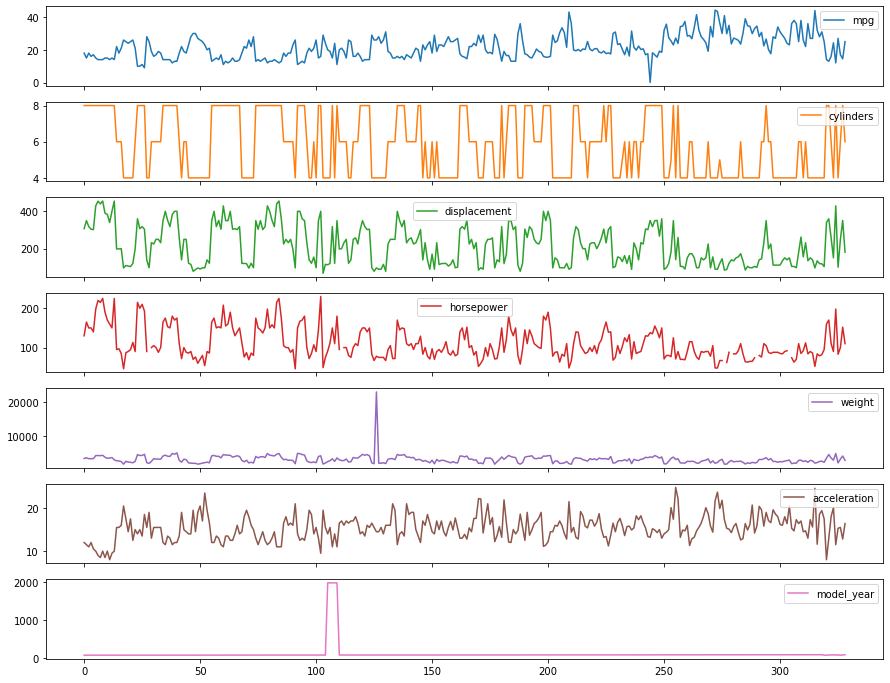

In [35]:
cars.plot(subplots = True, figsize = (15,12))
plt.show()

Lets start with the the column __model_year__ in more detail by analyzing the __frequency/counts__ of unique values.

In [36]:
cars.model_year.value_counts()

73      33
76      32
70      29
78      28
79      27
75      26
71      25
72      23
82      23
74      22
77      22
80      17
81      17
1973     5
Name: model_year, dtype: int64

There are 5 entries with 1973 instead of 73. 

Lets __replace__ the value __1973__.

In [37]:
cars.model_year.replace(1973, 73, inplace=True)

Now, lets inspect the column __weight__ by __sorting__ the values from __high to low__.

In [38]:
cars.weight.sort_values(ascending=False)

126    23000
40      5140
92      4997
38      4955
79      4952
324     4952
84      4951
93      4906
39      4746
83      4735
26      4732
120     4699
135     4668
138     4657
94      4654
321     4654
122     4638
60      4633
23      4615
61      4502
95      4499
137     4498
80      4464
35      4464
121     4457
62      4456
136     4440
8       4425
63      4422
56      4385
       ...  
128     2108
272     2085
206     2075
47      2074
48      2065
205     2051
28      2046
287     2045
170     2035
130     2000
236     1990
209     1985
305     1980
125     1963
50      1955
91      1950
202     1940
172     1937
151     1937
250     1925
251     1915
285     1875
103     1867
277     1845
276     1835
17      1835
49      1834
188     1825
177     1825
210     1800
Name: weight, Length: 329, dtype: int64

The by far highest value is 23000 lbs. Must be an error!

Lets __select__ the complete __row__ of the outlier with the method __idxmax()__.

In [42]:
cars.loc[cars.weight.idxmax()]

mpg                   26.0
cylinders                4
displacement          97.0
horsepower            78.0
weight               23000
acceleration          14.5
model_year              74
origin              europe
name            opel manta
Name: 126, dtype: object

It´s an opel manta. It could be a "fat finger" problem, weight could be 2300 instead of 23000.

Lets __overwrite__ the erroneous outlier.

In [43]:
cars.loc[126, "weight"] = 2300

Finally, lets inspect the column __mpg__.

In [44]:
cars.mpg.sort_values()

244     0.060606
26      9.000000
24     10.000000
23     10.000000
92     11.000000
109    11.000000
60     11.000000
25     11.000000
38     12.000000
84     12.000000
93     12.000000
79     12.000000
95     12.000000
62     12.000000
324    12.000000
74     13.000000
81     13.000000
94     13.000000
85     13.000000
145    13.000000
186    13.000000
83     13.000000
184    13.000000
39     13.000000
76     13.000000
120    13.000000
180    13.000000
66     13.000000
65     13.000000
185    13.000000
         ...    
316    32.000000
265    32.100000
289    33.000000
206    33.500000
263    33.500000
299    34.000000
257    34.200000
270    34.300000
287    34.400000
258    34.500000
290    34.500000
286    34.700000
278    35.000000
251    35.700000
307    36.000000
312    36.000000
305    36.000000
188    36.000000
210    36.100000
274    36.400000
259    37.300000
306    38.000000
309    38.000000
285    39.000000
276    40.900000
264    41.500000
209    43.100000
273    43.4000

An mpg of 0.060606 cannot be correct.

Lets __select__ the complete __row__ of the outlier with the method __idxmin()__.

In [45]:
cars.loc[cars.mpg.idxmin()]

mpg                          0.060606
cylinders                           8
displacement                    351.0
horsepower                      138.0
weight                           3955
acceleration                     13.2
model_year                         79
origin                  United States
name            mercury grand marquis
Name: 244, dtype: object

After some research we have found out that this extreme value is in __"gallons per mile"__ units instead of "miles per gallon". <br>

In [46]:
cars.loc[244,"mpg"] = 1/cars.loc[244, "mpg"]

Next, lets select all __rows__ with at least one __missing__/na value!

In [47]:
cars.loc[cars.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,25.0,4,98.0,NaN,2046,19.0,71,United States,ford pinto
111,21.0,6,200.0,NaN,2875,17.0,74,United States,ford maverick
276,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
279,23.6,4,140.0,NaN,2905,14.3,80,United States,ford mustang cobra
290,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
304,23.0,4,151.0,NaN,3035,20.5,82,United States,amc concord dl


There are 6 cars, where the horsepower is unknown.

As horsepower is an important feature in the cars dataset, we decide to remove all 6 rows.

In [49]:
cars=cars.drop([28,111,276,279,290,304])

Now let´s find __duplicates__. First, we need to understand __which columns__ we have to take into consideration to identify duplicates.

The first __naive assumption__ is that two cars cannot have the __same name__. Let´s count the number of __name-duplicates__.

In [51]:
cars.duplicated(subset= ["name"]).sum()

86

There are 86 potential duplicates to remove.

Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a name duplicate.

In [53]:
cars.loc[cars.duplicated(subset = ["name"], keep = False)].sort_values("name")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,24.3,4,151.0,90.0,3003,20.1,80,United States,amc concord
268,24.3,4,151.0,90.0,3003,20.1,80,United States,amc concord
219,19.4,6,232.0,90.0,3210,17.2,78,United States,amc concord
147,20.0,6,232.0,100.0,2914,16.0,75,United States,amc gremlin
96,18.0,6,232.0,100.0,2789,15.0,73,United States,amc gremlin
29,19.0,6,232.0,100.0,2634,13.0,71,United States,amc gremlin
22,21.0,6,199.0,90.0,2648,15.0,70,United States,amc gremlin
88,18.0,6,232.0,100.0,2945,16.0,73,United States,amc hornet
112,19.0,6,232.0,100.0,2901,16.0,74,United States,amc hornet
169,22.5,6,232.0,90.0,3085,17.6,76,United States,amc hornet


Cars can have several vintages/model_year and several variants with different technical specifications (e.g. weight, horsepower)  

To be on the safe side, let´s include __all columns__ to identify duplicates and __count__ the number of duplicates!

In [54]:
cars.duplicated().sum()

10

There are 10 potential duplicates.

Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a duplicate!

In [55]:
cars.loc[cars.duplicated()].sort_values("name")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,24.3,4,151.0,90.0,3003,20.1,80,United States,amc concord
322,16.0,6,258.0,110.0,3632,18.0,74,United States,amc matador
328,25.0,6,181.0,110.0,2945,16.4,82,United States,buick century limited
326,17.0,6,250.0,100.0,3329,15.5,71,United States,chevrolet chevelle malibu
327,14.5,8,351.0,152.0,4215,12.8,76,United States,ford gran torino
324,12.0,8,429.0,198.0,4952,11.5,73,United States,mercury marquis brougham
320,14.0,8,340.0,160.0,3609,8.0,70,United States,plymouth 'cuda 340
321,13.0,8,360.0,170.0,4654,13.0,73,United States,plymouth custom suburb
325,27.0,4,101.0,83.0,2202,15.3,76,europe,renault 12tl
319,25.0,4,104.0,95.0,2375,17.5,70,europe,saab 99e


All pairs seem to be real duplicates.

Lets __drop one instance__ of each duplicated pair!

In [56]:
cars.drop_duplicates(inplace=True)

In [57]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,United States,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,United States,ford torino


In [58]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           313 non-null    float64
 1   cylinders     313 non-null    int64  
 2   displacement  313 non-null    float64
 3   horsepower    313 non-null    float64
 4   weight        313 non-null    int64  
 5   acceleration  313 non-null    float64
 6   model_year    313 non-null    int64  
 7   origin        313 non-null    object 
 8   name          313 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 24.5+ KB


Our dataset seems to be pretty clean now! Lets __save__ and __export__ to a new csv-file (cars_clean.csv).

In [59]:
cars.to_csv("cars_clean.csv", index=False)

Lets call the __describe()__ method on all __non-numerical columns__!

In [60]:
cars.describe(include = "O")

,origin,name
count,313,313
unique,2,237
top,United States,vw rabbit
freq,245,5


There are some __categorical features__ (only few unique values) where the datatype could be __converted to "category"__.

In [61]:
cars.origin=cars.origin.astype("category")

In [62]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           313 non-null    float64 
 1   cylinders     313 non-null    int64   
 2   displacement  313 non-null    float64 
 3   horsepower    313 non-null    float64 
 4   weight        313 non-null    int64   
 5   acceleration  313 non-null    float64 
 6   model_year    313 non-null    int64   
 7   origin        313 non-null    category
 8   name          313 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 22.4+ KB


Yes, we reduced memory usage!